In [28]:
# https://stackoverflow.com/questions/43599018/is-there-a-way-to-get-matplotlib-path-contains-points-to-be-inclusive-of-boundar
#I do quite like this command in Jupiter notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#It makes things wider and not waste the space on your screen
import pandas as pd
import importlib
import csv,os
import numpy as np
import pandas as pd
import itertools
from uafgi import ioutil,shputil
import pyproj
import shapely

pd.set_option('display.max_rows', 30)


In [3]:
# Set up coordinate reference systems.
# wgs84: lon/lat from selections DataFrame (above)
#        (ultimately from glacier location database files)
wgs84 = pyproj.CRS.from_epsg("4326")

# Assume all grids use the same projection (NSIDC Polar Stereographic)
# Project everything to it
map_wkt = "PROJCS[\"WGS 84 / NSIDC Sea Ice Polar Stereographic North\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Polar_Stereographic\"],PARAMETER[\"latitude_of_origin\",70],PARAMETER[\"central_meridian\",-45],PARAMETER[\"false_easting\",0],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",SOUTH],AXIS[\"Northing\",SOUTH],AUTHORITY[\"EPSG\",\"3413\"]]"
#map_crs = pyproj.CRS.from_string(map_wkt)

# Transform from lat/lon into map projection
#transform_wgs84 = pyproj.Transformer.from_crs(wgs84,map_crs,always_xy=True)

print(map_wkt)

PROJCS["WGS 84 / NSIDC Sea Ice Polar Stereographic North",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",70],PARAMETER["central_meridian",-45],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",SOUTH],AXIS["Northing",SOUTH],AUTHORITY["EPSG","3413"]]


In [95]:
from uafgi import greenland
importlib.reload(greenland)

<module 'uafgi.greenland' from '/Users/eafischer2/harn/pismip6/uafgi/uafgi/greenland.py'>

In [92]:
bkm15 = greenland.read_bkm15(map_wkt)
print(bkm15.df.columns)
bkm15.df

Index(['bkm15_lat', 'bkm15_lon', 'bkm15_loc', 'bkm15_key', 'bkm15_allnames'], dtype='object')


,bkm15_lat,bkm15_lon,bkm15_loc,bkm15_key,bkm15_allnames
15,60.7977,-44.4902,POINT (28747.58266073823 -3230819.32265719),"(GGN0016,)","(Sermeq, Sermeq, Sermeq, nan, nan)"
16,60.8598,-44.8764,POINT (6954.42445973863 -3223774.69572626),"(GGN0017,)","(Siorallip Sermia, Siorallip Sermia, Sioragdli..."
17,60.9667,-44.9167,POINT (4668.998724843791 -3211449.375792087),"(GGN0018,)","(Sermeq Kangilleq, Sermeq Kangilleq, Sermeq Ka..."
18,60.9833,-45.0167,POINT (-935.4841858514704 -3209538.570818653),"(GGN0019,)","(Jespersen Bræ, nan, nan, Jespersen Bræ, nan)"
19,60.9845,-46.9863,POINT (-111239.5210340822 -3207471.956753827),"(GGN0020,)","(Sermilik, Sermilik, nan, Sermilik Bræ, nan)"
21,61.0088,-46.6860,POINT (-94344.56187064275 -3205210.496391462),"(GGN0022,)","(Qalerallit Sermiat, Qalerallit Sermiat, Qaler..."
22,61.0373,-46.5812,POINT (-88391.08156903904 -3202093.447745544),"(GGN0023,)","(Naajat Sermiat, Naajat Sermiat, Naujat Sermia..."
23,61.0500,-47.6667,POINT (-148968.8971989837 -3198381.92759317),"(GGN0024,)","(Nordre Qipisaqqu Bræ, nan, nan, Nordre Qipisa..."
24,61.0500,-47.5000,POINT (-139662.7031800014 -3198801.809494883),"(GGN0025,)","(Søndre Qipisaqqu Bræ, nan, nan, Søndre Qipisa..."
25,61.0900,-46.4184,POINT (-79141.96471293054 -3196259.309062144),"(GGN0026,)","(Ilorliit, Ilorliit, Ilordlît, nan, nan)"


<module 'uafgi.greenland' from '/Users/eafischer2/harn/pismip6/uafgi/uafgi/greenland.py'>

In [297]:
from uafgi import greenland
importlib.reload(greenland)
pd.set_option('display.max_rows', None)

m17 = greenland.read_m17(map_wkt)
print(m17.df.columns)
print(m17.units)
m17.df

Index(['m17_name', 'm17_lat', 'm17_lon', 'm17_speed', 'm17_drainage', 'm17_mc',
       'm17_bathy', 'm17_ice_front_depth_b2013', 'm17_ice_front_depth_rtopo2',
       'm17_ice_front_depth', 'm17_contconn300_b2013', 'm17_contcon300_rtopo2',
       'm17_contcon300', 'm17_contconn200_b2013', 'm17_contcon200_rtopo2',
       'm17_contcon200', 'm17_bathy_coverage', 'm17_loc', 'm17_key',
       'm17_allnames'],
      dtype='object')
{'m17_speed': 'm a-1', 'm17_drainage': 'km^2', 'm17_ice_front_depth_b2013': 'm', 'm17_ice_front_depth_rtopo2': 'm', 'm17_ice_front_depth': 'm', 'm17_loc': 'm'}


,m17_name,m17_lat,m17_lon,m17_speed,m17_drainage,m17_mc,m17_bathy,m17_ice_front_depth_b2013,m17_ice_front_depth_rtopo2,m17_ice_front_depth,m17_contconn300_b2013,m17_contcon300_rtopo2,m17_contcon300,m17_contconn200_b2013,m17_contcon200_rtopo2,m17_contcon200,m17_bathy_coverage,m17_loc,m17_key,m17_allnames
0,Jakobshavn Isbræ,69.1580,-49.6580,13255.0,90135.0,TW,1,1,-747.16000,-851.110000,-814.91000,1,1,0,1,1,1,POINT (-185314.9794306428 -2274444.822392135),"(Jakobshavn Isbræ, -49.658, 69.158)","(Jakobshavn Isbræ,)"
1,Kangerlussuaq Gletscher,68.6090,-32.9700,8141.0,95103.0,TW,1,0,-651.26000,-676.160000,-901.11000,1,0,1,1,0,1,POINT (488428.3323471585 -2291972.992205124),"(Kangerlussuaq Gletscher, -32.97, 68.609)","(Kangerlussuaq Gletscher,)"
2,Helheimgletscher,66.3680,-38.2130,7492.0,50023.0,TW,1,1,-832.51000,-648.030000,-658.45000,1,0,0,1,1,1,POINT (306726.2495522681 -2577257.151220952),"(Helheimgletscher, -38.213, 66.368)","(Helheimgletscher,)"
3,Køge Bugt C,65.1700,-41.1640,5240.0,18276.3,TW,1,0,-497.09000,-278.530000,-328.14000,0,0,0,0,0,1,POINT (182704.0390946306 -2724850.045440294),"(Køge Bugt C, -41.164, 65.17)","(Køge Bugt C,)"
4,Rink Isbræ,71.7590,-51.6060,4181.0,33171.0,TW,1,1,-849.78000,-780.040000,-726.10000,1,0,1,1,1,1,POINT (-229183.3083996871 -1978958.368034267),"(Rink Isbræ, -51.606, 71.759)","(Rink Isbræ,)"
5,Store Gletscher,70.4010,-50.5490,3678.0,30466.0,TW,1,1,82.80800,-219.040000,-357.80000,0,0,1,0,0,1,POINT (-207242.6988773894 -2133174.24533156),"(Store Gletscher, -50.549, 70.401)","(Store Gletscher,)"
6,Gyldenløve Fjord C,64.2450,-41.5880,3519.0,2456.6,TW,1,0,-15.24600,-63.310000,-511.19000,0,0,1,0,0,1,POINT (168786.9427163965 -2830992.084829327),"(Gyldenløve Fjord C, -41.588, 64.245)","(Gyldenløve Fjord C,)"
7,Daugaard-Jensen,71.9130,-28.6150,3513.0,49230.0,TW,1,1,-66.00200,-407.830000,-550.78000,0,1,1,0,1,1,POINT (557154.6552862267 -1894880.514483287),"(Daugaard-Jensen, -28.615, 71.913)","(Daugaard-Jensen,)"
8,Umiivik Fjord,64.4890,-40.6770,3492.0,1381.9,TW,0,0,-505.25000,-221.750000,-85.07700,1,0,0,1,0,0,POINT (211684.8427992095 -2800283.149518728),"(Umiivik Fjord, -40.677, 64.489)","(Umiivik Fjord,)"
9,Unnamed Uunartit Islands,67.4310,-33.5280,3371.0,3099.4,TW,1,0,-10.23500,-147.160000,-168.65000,0,0,0,0,0,0,POINT (492383.9841110682 -2426212.987001533),"(Unnamed Uunartit Islands, -33.528, 67.431)","(Unnamed Uunartit Islands,)"


In [242]:
from uafgi import greenland
importlib.reload(greenland)

w21 = greenland.read_w21(map_wkt)
print(w21.df.columns)

w21.df

/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/pandas/core/series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Index(['w21_popular_name', 'w21_greenlandic_name', 'w21_coast', 'w21_category',
       'w21_Qr', 'w21_Qf', 'w21_Qm', 'w21_Qs', 'w21_Qc_inferred', 'w21_qm',
       'w21_qf', 'w21_qc', 'w21_mean_depth', 'w21_min_depth',
       'w21_quality_str', 'w21_area_grounded_1992_2017',
       'w21_area_grounded_1992_1997', 'w21_area_grounded_1998_2007',
       'w21_area_grounded_2008_2017', 'w21_mean_fjord_width',
       'w21_length_grounded_1992_2017', 'w21_length_grounded_1992_1997',
       'w21_length_grounded_1998_2007', 'w21_length_grounded_2008_2017',
       'w21_ocean_model_sample_area', 'w21_mean_TF_1992-2017',
       'w21_mean_TF_1992-1997', 'w21_mean_TF_1998-2007',
       'w21_mean_TF_2008-2017', 'w21_subglacial_discharge_1992_2017',
       'w21_subglacial_discharge_1992_1997',
       'w21_subglacial_discharge_1998_2007',
       'w21_subglacial_discharge_2008_2017', 'w21_mean_xsection_area',
       'w21_mean_undercuttong_1992_2017', 'w21_mean_undercuttong_1992_1997',
       'w21_mean_und

,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,...,w21_mean_undercuttong_1992_1997,w21_mean_undercuttong_1998_2007,w21_mean_undercuttong_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_key,w21_allnames
0,Inngia Isbrae,Salliarutsip Sermia,CW,DW,9.00,8.54,0.73,0.00,16.81,0.53,...,0.50,0.80,0.45,41.07,INNGIA_ISBRAE,0.50,-0.6,0.2,"(Inngia Isbrae, INNGIA_ISBRAE)","(Inngia Isbrae, Salliarutsip Sermia)"
1,Umiammakku Isbrae,Umiammakku Sermiat,CW,DW,3.84,8.49,4.59,0.65,7.09,0.52,...,0.50,1.08,1.20,24.34,UMIAMMAKKU_ISBRAE,1.40,-0.8,0.8,"(Umiammakku Isbrae, UMIAMMAKKU_ISBRAE)","(Umiammakku Isbrae, Umiammakku Sermiat)"
2,Rink Isbrae,Kangilliup Sermia,CW,CR,1.19,1.08,4.11,0.20,NaN,NaN,...,1.13,1.56,1.78,22.13,RINK_ISBRAE,11.60,-0.4,11.6,"(Rink Isbrae, RINK_ISBRAE)","(Rink Isbrae, Kangilliup Sermia)"
3,Kangerlussuup Se.,Kangerlussuup Sermia,CW,CR,0.08,1.70,3.59,0.01,NaN,NaN,...,0.43,0.98,0.93,26.50,KANGERLUSSUUP_SERMERSUA,2.60,-0.9,2.2,"(Kangerlussuup Se., KANGERLUSSUUP_SERMERSUA)","(Kangerlussuup Se., Kangerlussuup Sermia)"
4,Kangerluarsuup Se.,Kangerluarsuup Sermia,CW,SC,1.10,-0.10,0.82,0.00,NaN,0.33,...,0.34,0.38,0.47,37.09,KANGERLUARSUUP_SERMIA,0.00,-0.2,0.0,"(Kangerluarsuup Se., KANGERLUARSUUP_SERMIA)","(Kangerluarsuup Se., Kangerluarsuup Sermia)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Upernavik Isstrom NW,,NW,DW,5.34,2.05,0.37,2.47,4.55,1.01,...,1.03,1.26,0.88,19.35,UPERNAVIK_ISSTROM_N,2.52,-1.1,1.6,"(Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)","(Upernavik Isstrom NW, )"
222,Upernavik Isstrom N,,NW,DW,6.96,10.57,2.70,1.62,13.21,0.87,...,0.87,1.31,1.16,19.26,UPERNAVIK_ISSTROM_N,3.60,-1.5,2.2,"(Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)","(Upernavik Isstrom N, )"
223,Upernavik Isstrom C,,NW,DW,3.89,4.65,3.09,1.33,4.12,0.85,...,0.85,1.25,1.27,19.38,UPERNAVIK_ISSTROM_C,4.70,-1.2,3.6,"(Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)","(Upernavik Isstrom C, )"
224,Upernavik Isstrom S,Sermeq,NW,CR,1.14,0.34,3.02,0.00,NaN,NaN,...,0.64,1.09,1.03,21.35,UPERNAVIK_ISSTROM_S,2.80,-1.9,1.2,"(Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)","(Upernavik Isstrom S, Sermeq)"


In [333]:
from uafgi import greenland
importlib.reload(greenland)
mwb = greenland.read_mwb(map_wkt)
mwb.df

,mwb_basin,mwb_name_ac,mwb_gl_type,mwb_id,mwb_id2,mwb_ugid,mwb_name,mwb_basin_poly,mwb_key,mwb_allnames
0,NW,UMIAMMAKKU_ISBRAE,TW,68.0,NaN,0,Umiammakku Isbræ,POLYGON ((-250013.9701917826 -1962482.80605197...,"(UMIAMMAKKU_ISBRAE,)","(UMIAMMAKKU_ISBRAE, Umiammakku Isbræ)"
1,CE,GEIKIE_UNNAMED_VESTFORD_S,TW,157.0,NaN,1,Unnamed Vestfjord S,POLYGON ((669064.8561138965 -2093802.343986421...,"(GEIKIE_UNNAMED_VESTFORD_S,)","(GEIKIE_UNNAMED_VESTFORD_S, Unnamed Vestfjord S)"
2,CW,RINK_ISBRAE,TW,5.0,NaN,2,Rink Isbræ,"POLYGON ((245236.0564157573 -1890271.27307048,...","(RINK_ISBRAE,)","(RINK_ISBRAE, Rink Isbræ)"
3,CW,KANGERLUSSUUP_SERMERSUA,TW,47.0,NaN,3,Kangerlussuup Sermersua,POLYGON ((245014.5823818928 -1891216.648604154...,"(KANGERLUSSUUP_SERMERSUA,)","(KANGERLUSSUUP_SERMERSUA, Kangerlussuup Sermer..."
4,CW,CW_NONAME3,LT,NaN,NaN,4,,POLYGON ((-196828.2451061502 -2054377.44781584...,"(CW_NONAME3,)","(CW_NONAME3, )"
5,CW,SERMEQ_SILARLEQ,TW,25.0,NaN,5,Sermeq Silarleq,POLYGON ((244456.5506082022 -1894068.798357822...,"(SERMEQ_SILARLEQ,)","(SERMEQ_SILARLEQ, Sermeq Silarleq)"
6,CW,CW_NONAME2,TW,NaN,NaN,6,,"POLYGON ((244239.6365934493 -1895211.83300331,...","(CW_NONAME2,)","(CW_NONAME2, )"
7,CW,LILLE_GLETSCHER,TW,134.0,NaN,7,Lille Gletscher,POLYGON ((244282.7104458626 -1895816.255104747...,"(LILLE_GLETSCHER,)","(LILLE_GLETSCHER, Lille Gletscher)"
8,CW,STORE_GLETSCHER,TW,6.0,NaN,8,Store Gletscher,POLYGON ((247942.1156973264 -1940953.009317309...,"(STORE_GLETSCHER,)","(STORE_GLETSCHER, Store Gletscher)"
9,CW,SERMEQ_AVANNARLEQ2,TW,53.0,NaN,9,Sermeq Avannarleq,POLYGON ((250387.0695524997 -1959439.200488108...,"(SERMEQ_AVANNARLEQ2,)","(SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)"


In [264]:
from uafgi import greenland
importlib.reload(greenland)

match = greenland.match_on_allnames(w21,mwb)
print(match)
#match.df
df = match.left_join(over, ignore_dups=False, right_cols=['mwb_key'])
df[~df['mwb_key'].isna()]

Match([(ExtDf(w21_), 'w21_allnames'), (ExtDf(mwb_), 'mwb_allnames')], len=138)
xf=ExtDf(w21_)
xf=ExtDf(mwb_)
Index(['w21_ix', 'mwb_ix', 'dir', 'lev', 'w21_key', 'mwb_key', 'w21_allnames',
       'mwb_allnames'],
      dtype='object')
6      True
7      True
8      True
9      True
10     True
11     True
12     True
15     True
16     True
17     True
18     True
22     True
23     True
61     True
62     True
69     True
70     True
86     True
87     True
88     True
89     True
90     True
91     True
108    True
109    True
113    True
114    True
118    True
119    True
120    True
121    True
122    True
123    True
124    True
125    True
126    True
127    True
128    True
129    True
130    True
131    True
132    True
133    True
134    True
135    True
136    True
137    True
Name: w21_key, dtype: bool


ValueError: Duplicate right values found in left outer join.
     w21_ix  mwb_ix    dir  lev                                          w21_key                      mwb_key                                     w21_allnames                                        mwb_allnames
0         9       7   True  1.0                     (Lille Gl., LILLE_GLETSCHER)           (LILLE_GLETSCHER,)                   (Lille Gl., Sermeq Avannarleq)                  (LILLE_GLETSCHER, Lille Gletscher)
1         9       7   True  1.0                     (Lille Gl., LILLE_GLETSCHER)           (LILLE_GLETSCHER,)                   (Lille Gl., Sermeq Avannarleq)                  (LILLE_GLETSCHER, Lille Gletscher)
2         9       7   True  1.0                     (Lille Gl., LILLE_GLETSCHER)           (LILLE_GLETSCHER,)                   (Lille Gl., Sermeq Avannarleq)                  (LILLE_GLETSCHER, Lille Gletscher)
3         9       9   True  1.0                     (Lille Gl., LILLE_GLETSCHER)        (SERMEQ_AVANNARLEQ2,)                   (Lille Gl., Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
4         9       9   True  1.0                     (Lille Gl., LILLE_GLETSCHER)        (SERMEQ_AVANNARLEQ2,)                   (Lille Gl., Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
5         9       9   True  1.0                     (Lille Gl., LILLE_GLETSCHER)        (SERMEQ_AVANNARLEQ2,)                   (Lille Gl., Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
6         9     229   True  1.0                     (Lille Gl., LILLE_GLETSCHER)         (SERMEQ_AVANNARLEQ,)                   (Lille Gl., Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
7         9     229   True  1.0                     (Lille Gl., LILLE_GLETSCHER)         (SERMEQ_AVANNARLEQ,)                   (Lille Gl., Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
8         9     229   True  1.0                     (Lille Gl., LILLE_GLETSCHER)         (SERMEQ_AVANNARLEQ,)                   (Lille Gl., Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
9        10       8   True  1.0                     (Store Gl., STORE_GLETSCHER)           (STORE_GLETSCHER,)                     (Store Gl., Sermeq Kujalleq)                  (STORE_GLETSCHER, Store Gletscher)
10       10       8   True  1.0                     (Store Gl., STORE_GLETSCHER)           (STORE_GLETSCHER,)                     (Store Gl., Sermeq Kujalleq)                  (STORE_GLETSCHER, Store Gletscher)
11       10      81   True  1.0                     (Store Gl., STORE_GLETSCHER)           (SERMEQ_KUJALLEQ,)                     (Store Gl., Sermeq Kujalleq)                  (SERMEQ_KUJALLEQ, Sermeq Kujalleq)
12       10      81   True  1.0                     (Store Gl., STORE_GLETSCHER)           (SERMEQ_KUJALLEQ,)                     (Store Gl., Sermeq Kujalleq)                  (SERMEQ_KUJALLEQ, Sermeq Kujalleq)
13       11       9   True  1.0          (Sermeq Avannarleq, SERMEQ_AVANNARLEQ2)        (SERMEQ_AVANNARLEQ2,)           (Sermeq Avannarleq, Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
14       11       9   True  1.0          (Sermeq Avannarleq, SERMEQ_AVANNARLEQ2)        (SERMEQ_AVANNARLEQ2,)           (Sermeq Avannarleq, Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
15       11     229   True  1.0          (Sermeq Avannarleq, SERMEQ_AVANNARLEQ2)         (SERMEQ_AVANNARLEQ,)           (Sermeq Avannarleq, Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
16       11     229   True  1.0          (Sermeq Avannarleq, SERMEQ_AVANNARLEQ2)         (SERMEQ_AVANNARLEQ,)           (Sermeq Avannarleq, Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
17       15       9   True  1.0           (Sermeq Avannarleq, SERMEQ_AVANNARLEQ)        (SERMEQ_AVANNARLEQ2,)           (Sermeq Avannarleq, Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
18       15       9   True  1.0           (Sermeq Avannarleq, SERMEQ_AVANNARLEQ)        (SERMEQ_AVANNARLEQ2,)           (Sermeq Avannarleq, Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
19       15     229   True  1.0           (Sermeq Avannarleq, SERMEQ_AVANNARLEQ)         (SERMEQ_AVANNARLEQ,)           (Sermeq Avannarleq, Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
20       15     229   True  1.0           (Sermeq Avannarleq, SERMEQ_AVANNARLEQ)         (SERMEQ_AVANNARLEQ,)           (Sermeq Avannarleq, Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
21       16      81   True  1.0           (Jakobshavn Isbrae, JAKOBSHAVN_ISBRAE)           (SERMEQ_KUJALLEQ,)             (Jakobshavn Isbrae, Sermeq Kujalleq)                  (SERMEQ_KUJALLEQ, Sermeq Kujalleq)
22       16      81   True  1.0           (Jakobshavn Isbrae, JAKOBSHAVN_ISBRAE)           (SERMEQ_KUJALLEQ,)             (Jakobshavn Isbrae, Sermeq Kujalleq)                  (SERMEQ_KUJALLEQ, Sermeq Kujalleq)
23       16     225   True  1.0           (Jakobshavn Isbrae, JAKOBSHAVN_ISBRAE)         (JAKOBSHAVN_ISBRAE,)             (Jakobshavn Isbrae, Sermeq Kujalleq)               (JAKOBSHAVN_ISBRAE, Jakobshavn Isbræ)
24       16     225   True  1.0           (Jakobshavn Isbrae, JAKOBSHAVN_ISBRAE)         (JAKOBSHAVN_ISBRAE,)             (Jakobshavn Isbrae, Sermeq Kujalleq)               (JAKOBSHAVN_ISBRAE, Jakobshavn Isbræ)
25       21      12   True  1.0  (Kangiata Nunaata Se., KANGIATA_NUNAATA_SERMIA)     (KANGILINNGUATA_SERMIA,)  (Kangiata Nunaata Se., Kangiata Nunaata Sermia)    (KANGILINNGUATA_SERMIA, Kangiata Nunaata Sermia)
26       21      12   True  1.0  (Kangiata Nunaata Se., KANGIATA_NUNAATA_SERMIA)     (KANGILINNGUATA_SERMIA,)  (Kangiata Nunaata Se., Kangiata Nunaata Sermia)    (KANGILINNGUATA_SERMIA, Kangiata Nunaata Sermia)
27       21      15   True  1.0  (Kangiata Nunaata Se., KANGIATA_NUNAATA_SERMIA)   (KANGIATA_NUNAATA_SERMIA,)  (Kangiata Nunaata Se., Kangiata Nunaata Sermia)  (KANGIATA_NUNAATA_SERMIA, Kangiata Nunaata Sermia)
28       21      15   True  1.0  (Kangiata Nunaata Se., KANGIATA_NUNAATA_SERMIA)   (KANGIATA_NUNAATA_SERMIA,)  (Kangiata Nunaata Se., Kangiata Nunaata Sermia)  (KANGIATA_NUNAATA_SERMIA, Kangiata Nunaata Sermia)
29      151     230   True  1.0             (Petermann Gl., PETERMANN_GLETSCHER)       (PETERMANN_GLETSCHER,)                                (Petermann Gl., )          (PETERMANN_GLETSCHER, Petermann Gletscher)
30      151     230   True  1.0             (Petermann Gl., PETERMANN_GLETSCHER)       (PETERMANN_GLETSCHER,)                                (Petermann Gl., )          (PETERMANN_GLETSCHER, Petermann Gletscher)
31      151     231  False  1.0             (Petermann Gl., PETERMANN_GLETSCHER)     (PETERMANN_GLETSCHER_N,)                                (Petermann Gl., )                           (PETERMANN_GLETSCHER_N, )
32      151     231  False  1.0             (Petermann Gl., PETERMANN_GLETSCHER)     (PETERMANN_GLETSCHER_N,)                                (Petermann Gl., )                           (PETERMANN_GLETSCHER_N, )
33      158      85   True  1.0                           (Bowdoin Gl., BOWDOIN)     (KANGERLUARSUUP_SERMIA,)             (Bowdoin Gl., Kangerluarsuup Sermia)      (KANGERLUARSUUP_SERMIA, Kangerluarsuup Sermia)
34      158      85   True  1.0                           (Bowdoin Gl., BOWDOIN)     (KANGERLUARSUUP_SERMIA,)             (Bowdoin Gl., Kangerluarsuup Sermia)      (KANGERLUARSUUP_SERMIA, Kangerluarsuup Sermia)
35      158     171   True  1.0                           (Bowdoin Gl., BOWDOIN)                   (BOWDOIN,)             (Bowdoin Gl., Kangerluarsuup Sermia)                        (BOWDOIN, Bowdoin Gletscher)
36      158     171   True  1.0                           (Bowdoin Gl., BOWDOIN)                   (BOWDOIN,)             (Bowdoin Gl., Kangerluarsuup Sermia)                        (BOWDOIN, Bowdoin Gletscher)
37      184      78  False  1.0   (Docker Smith Gl. W, DOCKER_SMITH_GLETSCHER_W)    (DOCKER_SMITH_GLETSCHER,)                           (Docker Smith Gl. W, )    (DOCKER_SMITH_GLETSCHER, Døcker Smith Gletscher)
38      184      78  False  1.0   (Docker Smith Gl. W, DOCKER_SMITH_GLETSCHER_W)    (DOCKER_SMITH_GLETSCHER,)                           (Docker Smith Gl. W, )    (DOCKER_SMITH_GLETSCHER, Døcker Smith Gletscher)
39      184     155   True  1.0   (Docker Smith Gl. W, DOCKER_SMITH_GLETSCHER_W)  (DOCKER_SMITH_GLETSCHER_W,)                           (Docker Smith Gl. W, )      (DOCKER_SMITH_GLETSCHER_W, Døcker Smith Gl. W)
40      184     155   True  1.0   (Docker Smith Gl. W, DOCKER_SMITH_GLETSCHER_W)  (DOCKER_SMITH_GLETSCHER_W,)                           (Docker Smith Gl. W, )      (DOCKER_SMITH_GLETSCHER_W, Døcker Smith Gl. W)
41      185      78   True  1.0       (Docker Smith Gl., DOCKER_SMITH_GLETSCHER)    (DOCKER_SMITH_GLETSCHER,)     (Docker Smith Gl., Qeqertat Timaanni Sermeq)    (DOCKER_SMITH_GLETSCHER, Døcker Smith Gletscher)
42      185      78   True  1.0       (Docker Smith Gl., DOCKER_SMITH_GLETSCHER)    (DOCKER_SMITH_GLETSCHER,)     (Docker Smith Gl., Qeqertat Timaanni Sermeq)    (DOCKER_SMITH_GLETSCHER, Døcker Smith Gletscher)
43      185     155  False  1.0       (Docker Smith Gl., DOCKER_SMITH_GLETSCHER)  (DOCKER_SMITH_GLETSCHER_W,)     (Docker Smith Gl., Qeqertat Timaanni Sermeq)      (DOCKER_SMITH_GLETSCHER_W, Døcker Smith Gl. W)
44      185     155  False  1.0       (Docker Smith Gl., DOCKER_SMITH_GLETSCHER)  (DOCKER_SMITH_GLETSCHER_W,)     (Docker Smith Gl., Qeqertat Timaanni Sermeq)      (DOCKER_SMITH_GLETSCHER_W, Døcker Smith Gl. W)
45      186      78  False  1.0     (Docker Smith Gl. E, DOCKER_SMITH_GLETSCHER)    (DOCKER_SMITH_GLETSCHER,)                           (Docker Smith Gl. E, )    (DOCKER_SMITH_GLETSCHER, Døcker Smith Gletscher)
46      186      78  False  1.0     (Docker Smith Gl. E, DOCKER_SMITH_GLETSCHER)    (DOCKER_SMITH_GLETSCHER,)                           (Docker Smith Gl. E, )    (DOCKER_SMITH_GLETSCHER, Døcker Smith Gletscher)
47      186     155  False  1.0     (Docker Smith Gl. E, DOCKER_SMITH_GLETSCHER)  (DOCKER_SMITH_GLETSCHER_W,)                           (Docker Smith Gl. E, )      (DOCKER_SMITH_GLETSCHER_W, Døcker Smith Gl. W)
48      186     155  False  1.0     (Docker Smith Gl. E, DOCKER_SMITH_GLETSCHER)  (DOCKER_SMITH_GLETSCHER_W,)                           (Docker Smith Gl. E, )      (DOCKER_SMITH_GLETSCHER_W, Døcker Smith Gl. W)
49      209      25   True  1.0                   (Alison Gl., ALISON_GLETSCHER)      (NUNATAKASSAAP_SERMIA,)               (Alison Gl., Nunatakassaap Sermia)        (NUNATAKASSAAP_SERMIA, Nunatakassaap Sermia)
50      209      25   True  1.0                   (Alison Gl., ALISON_GLETSCHER)      (NUNATAKASSAAP_SERMIA,)               (Alison Gl., Nunatakassaap Sermia)        (NUNATAKASSAAP_SERMIA, Nunatakassaap Sermia)
51      209      32   True  1.0                   (Alison Gl., ALISON_GLETSCHER)          (ALISON_GLETSCHER,)               (Alison Gl., Nunatakassaap Sermia)                (ALISON_GLETSCHER, Alison Gletscher)
52      209      32   True  1.0                   (Alison Gl., ALISON_GLETSCHER)          (ALISON_GLETSCHER,)               (Alison Gl., Nunatakassaap Sermia)                (ALISON_GLETSCHER, Alison Gletscher)
53      213       9   True  1.0                  (Ussing Br. N, USSING_BRAEER_N)        (SERMEQ_AVANNARLEQ2,)                (Ussing Br. N, Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
54      213       9   True  1.0                  (Ussing Br. N, USSING_BRAEER_N)        (SERMEQ_AVANNARLEQ2,)                (Ussing Br. N, Sermeq Avannarleq)             (SERMEQ_AVANNARLEQ2, Sermeq Avannarleq)
55      213     229   True  1.0                  (Ussing Br. N, USSING_BRAEER_N)         (SERMEQ_AVANNARLEQ,)                (Ussing Br. N, Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
56      213     229   True  1.0                  (Ussing Br. N, USSING_BRAEER_N)         (SERMEQ_AVANNARLEQ,)                (Ussing Br. N, Sermeq Avannarleq)              (SERMEQ_AVANNARLEQ, Sermeq Avannarleq)
57      221      24  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom NW, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
58      221      24  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom NW, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
59      221      24  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom NW, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
60      221      24  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom NW, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
61      221      86  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
62      221      86  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
63      221      86  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
64      221      86  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
65      221     214  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
66      221     214  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
67      221     214  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
68      221     214  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
69      221     215  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
70      221     215  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
71      221     215  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
72      221     215  False  1.0      (Upernavik Isstrom NW, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom NW, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
73      222      24  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom N, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
74      222      24  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom N, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
75      222      24  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom N, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
76      222      24  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom N, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
77      222      86   True  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
78      222      86   True  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
79      222      86   True  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
80      222      86   True  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
81      222     214  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
82      222     214  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
83      222     214  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
84      222     214  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
85      222     215  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
86      222     215  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
87      222     215  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
88      222     215  False  1.0       (Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom N, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
89      223      24  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom C, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
90      223      24  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom C, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
91      223      24  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom C, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
92      223      24  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)      (UPERNAVIK_ISSTROM_SS,)                          (Upernavik Isstrom C, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
93      223      86  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
94      223      86  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
95      223      86  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
96      223      86  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_N,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
97      223     214   True  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
98      223     214   True  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
99      223     214   True  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
100     223     214   True  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_C,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
101     223     215  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
102     223     215  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
103     223     215  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
104     223     215  False  1.0       (Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)       (UPERNAVIK_ISSTROM_S,)                          (Upernavik Isstrom C, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
105     224      24  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)      (UPERNAVIK_ISSTROM_SS,)                    (Upernavik Isstrom S, Sermeq)                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
106     224      24  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)      (UPERNAVIK_ISSTROM_SS,)                    (Upernavik Isstrom S, Sermeq)                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
107     224      24  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)      (UPERNAVIK_ISSTROM_SS,)                    (Upernavik Isstrom S, Sermeq)                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
108     224      24  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)      (UPERNAVIK_ISSTROM_SS,)                    (Upernavik Isstrom S, Sermeq)                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
109     224      86  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_N,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
110     224      86  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_N,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
111     224      86  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_N,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
112     224      86  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_N,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
113     224     214  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_C,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
114     224     214  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_C,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
115     224     214  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_C,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
116     224     214  False  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_C,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
117     224     215   True  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_S,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
118     224     215   True  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_S,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
119     224     215   True  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_S,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
120     224     215   True  1.0       (Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)       (UPERNAVIK_ISSTROM_S,)                    (Upernavik Isstrom S, Sermeq)          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
121     225      24   True  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom SS, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
122     225      24   True  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom SS, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
123     225      24   True  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom SS, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
124     225      24   True  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)      (UPERNAVIK_ISSTROM_SS,)                         (Upernavik Isstrom SS, )                (UPERNAVIK_ISSTROM_SS, Upernavik SS)
125     225      86  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
126     225      86  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
127     225      86  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
128     225      86  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_N,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_N, Upernavik Isstrøm N)
129     225     214  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
130     225     214  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
131     225     214  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
132     225     214  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_C,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_C, Upernavik Isstrøm C)
133     225     215  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
134     225     215  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
135     225     215  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)
136     225     215  False  1.0     (Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)       (UPERNAVIK_ISSTROM_S,)                         (Upernavik Isstrom SS, )          (UPERNAVIK_ISSTROM_S, Upernavik Isstrøm S)

In [250]:
#from uafgi import greenland
#importlib.reload(greenland)


xf=ExtDf(w21_)
xf=ExtDf(mwb_)


TypeError: merge() got an unexpected keyword argument 'type'

In [251]:
# Remove extraneous columns
matchdf = match.df[['mwb_ix', 'w21_ix', 'mwb_key', 'w21_key']]

over = matchdf.loc[[1,454,1136]][['mwb_key', 'w21_key']]

xf0=w21
for xf in (w21,mwb):
    df = xf.df
    key = xf.prefix+'key'

    #pd.merge(over, df.reset_index(), how='left', on=key)
    over = pd.merge(over, df[[key]].reset_index(), how='left', on=key).rename(columns={'index':xf.prefix+'ix'})

#over = over.reset_index()
#print(over)
print(over[[xf0.prefix+'key']])
print(matchdf.columns)

# Remove overridden rows (from left) from our match DataFrame
key = xf0.prefix+'key'
df = pd.merge(matchdf, over[[key]], how='left', on=key, indicator=True)
df = df[df['_merge'] != 'both'].drop(['_merge'], axis=1)
#df = df.reset_index()

# Add in overrides
df = pd.concat([over,df], ignore_index=True)

# Check for duplicate xf0 keys
dups0 = df[xf0.prefix+'key'].duplicated(keep=False)
dups = dups0[dups0]

df.loc[dups.index].sort_values(xf0.prefix+'key')
#print(df.columns)
#print(over.columns)

# Remove all dups for testing...
df = df[~dups0]
df.sort_values(xf0.prefix+'key')
matchdf = df

# Do the join!
# https://stackoverflow.com/questions/11976503/how-to-keep-index-when-using-pandas-merge
df = pd.merge(w21.df.reset_index(), matchdf, how='left', left_index=True, right_on='w21_ix', suffixes=(None,'_zzz')).set_index('index')
df = pd.merge(df.reset_index(), mwb.df[['mwb_id2']], how='left', left_on='mwb_ix', right_index=True, suffixes=(None,'_zzz')).set_index('index')
# TODO: Now remove extra columns: xxx_ix, xxx_zzz
df

KeyError: "None of [Int64Index([1, 454, 1136], dtype='int64')] are in the [index]"

In [252]:
pd.set_option('display.max_rows', 200)
xcols

NameError: name 'xcols' is not defined

101


,mwb_ix,w21_ix,val,mwb_name_ac,mwb_name,w21_popular_name,w21_greenlandic_name
1,0,1,1.0,UMIAMMAKKU_ISBRAE,Umiammakku Isbræ,Umiammakku Isbrae,Umiammakku Sermiat
454,2,2,1.0,RINK_ISBRAE,Rink Isbræ,Rink Isbrae,Kangilliup Sermia
1136,5,6,1.0,SERMEQ_SILARLEQ,Sermeq Silarleq,Sermeq Silarleq,Sermeq Silarleq
1591,7,9,1.0,LILLE_GLETSCHER,Lille Gletscher,Lille Gl.,Sermeq Avannarleq
1818,8,10,1.0,STORE_GLETSCHER,Store Gletscher,Store Gl.,Sermeq Kujalleq
2043,9,9,1.0,SERMEQ_AVANNARLEQ2,Sermeq Avannarleq,Lille Gl.,Sermeq Avannarleq
2045,9,11,1.0,SERMEQ_AVANNARLEQ2,Sermeq Avannarleq,Sermeq Avannarleq,Sermeq Avannarleq
2049,9,15,1.0,SERMEQ_AVANNARLEQ2,Sermeq Avannarleq,Sermeq Avannarleq,Sermeq Avannarleq
2247,9,213,1.0,SERMEQ_AVANNARLEQ2,Sermeq Avannarleq,Ussing Br. N,Sermeq Avannarleq
2733,12,21,1.0,KANGILINNGUATA_SERMIA,Kangiata Nunaata Sermia,Kangiata Nunaata Se.,Kangiata Nunaata Sermia


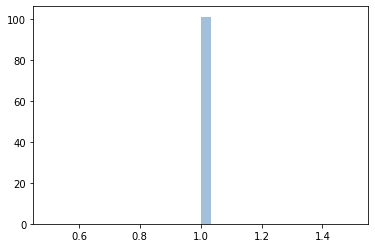

In [226]:
%matplotlib inline

df = xcols
#df = df[(df['val'] > .8) & (df['val'] < 1.0)]
df = df[df['val'] == 1.0]



import matplotlib.pyplot as plt
plt.hist(df.val, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

print(len(df))
pd.set_option('display.max_rows', 200)
df

In [183]:
#dfx0 = df0.loc[lcols['ix0']]
#dfx1 = df1.loc[lcols['ix1']]
#mg = lcols.merge(dfx0, left_index=True, right_index=True, how='outer')
#mg = mg.merge(dfx1, left_index=True, right_index=True, how='outer')
for dfx in (df0,df1):
    for x in dfx.columns:
        lcols[x] = dfx[x]
lcols

,ix0,ix1,val,mwb_name_ac,mwb_name,w21_popular_name,w21_greenlandic_name
0,0,0,0.689655,UMIAMMAKKU_ISBRAE,Umiammakku Isbræ,Inngia Isbrae,Salliarutsip Sermia
1,0,1,1.000000,GEIKIE_UNNAMED_VESTFORD_S,Unnamed Vestfjord S,Umiammakku Isbrae,Umiammakku Sermiat
2,0,2,0.703704,RINK_ISBRAE,Rink Isbræ,Rink Isbrae,Kangilliup Sermia
3,0,3,0.562500,KANGERLUSSUUP_SERMERSUA,Kangerlussuup Sermersua,Kangerlussuup Se.,Kangerlussuup Sermia
4,0,4,0.567568,CW_NONAME3,,Kangerluarsuup Se.,Kangerluarsuup Sermia
5,0,5,0.575758,SERMEQ_SILARLEQ,Sermeq Silarleq,Perlerfiup Se.,Perlerfiup Sermia
6,0,6,0.580645,CW_NONAME2,,Sermeq Silarleq,Sermeq Silarleq
7,0,7,0.400000,LILLE_GLETSCHER,Lille Gletscher,Kangilleq,Kangilleq
8,0,8,0.375000,STORE_GLETSCHER,Store Gletscher,Sermilik,Sermilik
9,0,9,0.575758,SERMEQ_AVANNARLEQ2,Sermeq Avannarleq,Lille Gl.,Sermeq Avannarleq


In [171]:
mg

,ix0,ix1,val,mwb_name_ac,mwb_name,w21_popular_name,w21_greenlandic_name
0,0,0,0.689655,UMIAMMAKKU_ISBRAE,Umiammakku Isbræ,Inngia Isbrae,Salliarutsip Sermia
0,0,0,0.689655,UMIAMMAKKU_ISBRAE,Umiammakku Isbræ,Inngia Isbrae,Salliarutsip Sermia
0,0,0,0.689655,UMIAMMAKKU_ISBRAE,Umiammakku Isbræ,Inngia Isbrae,Salliarutsip Sermia
0,0,0,0.689655,UMIAMMAKKU_ISBRAE,Umiammakku Isbræ,Inngia Isbrae,Salliarutsip Sermia
0,0,0,0.689655,UMIAMMAKKU_ISBRAE,Umiammakku Isbræ,Inngia Isbrae,Salliarutsip Sermia
...,...,...,...,...,...,...,...
55817,246,221,0.545455,NaN,NaN,NaN,NaN
55818,246,222,0.542857,NaN,NaN,NaN,NaN
55819,246,223,0.514286,NaN,NaN,NaN,NaN
55820,246,224,0.534884,NaN,NaN,NaN,NaN


In [ ]:
def polys_overlapping_points(points_s, polys, poly_outs, poly_label='poly'):

    """Given a list of points and polygons... finds which polygons overlap
    each point.

    points_s: pd.Series(shapely.geometry.Point)
        Pandas Series containing the Points (with index)
    polys: [poly, ...]
        List of shapely.geometry.Polygon
    poly_outs: [x, ...]
        Item to place in resulting DataFrame in place of the Polygon.
        Could be the same as the polygon.

    """

    # Load the grids 
    out_s = list()
    for poly,poly_out in zip(polys,poly_outs):

        # Find intersections between terminus locations and this grid
        # NOTE: intersects includes selections.index
        intersects = points_s[points_s.map(lambda p: poly.intersects(p))]

        out_s.append(pd.Series(index=intersects.index, data=[poly_out] * len(intersects),name=poly_label))

    grids = pd.concat(out_s, axis=0)
    return grids

In [337]:
from uafgi import greenland
importlib.reload(greenland)

match = greenland.match_point_poly(m17, 'm17_loc', mwb, 'mwb_basin_poly', right_cols=['mwb_key'])
print(match.df.columns)
print(m17.df.columns)

df = match.left_join(ignore_dups=False, right_cols=['mwb_key'])
##df[~df['mwb_key'].isna()]
df

Index(['m17_ix', 'mwb_ix', 'm17_key', 'mwb_key'], dtype='object')
Index(['m17_name', 'm17_lat', 'm17_lon', 'm17_speed', 'm17_drainage', 'm17_mc',
       'm17_bathy', 'm17_ice_front_depth_b2013', 'm17_ice_front_depth_rtopo2',
       'm17_ice_front_depth', 'm17_contconn300_b2013', 'm17_contcon300_rtopo2',
       'm17_contcon300', 'm17_contconn200_b2013', 'm17_contcon200_rtopo2',
       'm17_contcon200', 'm17_bathy_coverage', 'm17_loc', 'm17_key',
       'm17_allnames'],
      dtype='object')
xf=ExtDf(m17_)
key  m17_key
over  Index(['m17_ix', 'm17_key', 'mwb_ix', 'mwb_key'], dtype='object')
df  Index(['m17_name', 'm17_lat', 'm17_lon', 'm17_speed', 'm17_drainage', 'm17_mc',
       'm17_bathy', 'm17_ice_front_depth_b2013', 'm17_ice_front_depth_rtopo2',
       'm17_ice_front_depth', 'm17_contconn300_b2013', 'm17_contcon300_rtopo2',
       'm17_contcon300', 'm17_contconn200_b2013', 'm17_contcon200_rtopo2',
       'm17_contcon200', 'm17_bathy_coverage', 'm17_loc', 'm17_key',
       'm17_allnam

,m17_name,m17_lat,m17_lon,m17_speed,m17_drainage,m17_mc,m17_bathy,m17_ice_front_depth_b2013,m17_ice_front_depth_rtopo2,m17_ice_front_depth,...,m17_contcon300_rtopo2,m17_contcon300,m17_contconn200_b2013,m17_contcon200_rtopo2,m17_contcon200,m17_bathy_coverage,m17_loc,m17_key,m17_allnames,mwb_key
index,,,,,,,,,,,,,,,,,,,,,
0,Jakobshavn Isbræ,69.1580,-49.6580,13255.0,90135.0,TW,1,1,-747.16000,-851.110000,...,1,1,0,1,1,1,POINT (-185314.9794306428 -2274444.822392135),"(Jakobshavn Isbræ, -49.658, 69.158)","(Jakobshavn Isbræ,)","(JAKOBSHAVN_ISBRAE,)"
1,Kangerlussuaq Gletscher,68.6090,-32.9700,8141.0,95103.0,TW,1,0,-651.26000,-676.160000,...,1,0,1,1,0,1,POINT (488428.3323471585 -2291972.992205124),"(Kangerlussuaq Gletscher, -32.97, 68.609)","(Kangerlussuaq Gletscher,)","(KANGERLUSSUAQ,)"
2,Helheimgletscher,66.3680,-38.2130,7492.0,50023.0,TW,1,1,-832.51000,-648.030000,...,1,0,0,1,1,1,POINT (306726.2495522681 -2577257.151220952),"(Helheimgletscher, -38.213, 66.368)","(Helheimgletscher,)","(HELHEIMGLETSCHER,)"
3,Køge Bugt C,65.1700,-41.1640,5240.0,18276.3,TW,1,0,-497.09000,-278.530000,...,0,0,0,0,0,1,POINT (182704.0390946306 -2724850.045440294),"(Køge Bugt C, -41.164, 65.17)","(Køge Bugt C,)","(KOGE_BUGT_C,)"
4,Rink Isbræ,71.7590,-51.6060,4181.0,33171.0,TW,1,1,-849.78000,-780.040000,...,1,0,1,1,1,1,POINT (-229183.3083996871 -1978958.368034267),"(Rink Isbræ, -51.606, 71.759)","(Rink Isbræ,)","(RINK_ISBRAE,)"
5,Store Gletscher,70.4010,-50.5490,3678.0,30466.0,TW,1,1,82.80800,-219.040000,...,0,0,1,0,0,1,POINT (-207242.6988773894 -2133174.24533156),"(Store Gletscher, -50.549, 70.401)","(Store Gletscher,)","(STORE_GLETSCHER,)"
6,Gyldenløve Fjord C,64.2450,-41.5880,3519.0,2456.6,TW,1,0,-15.24600,-63.310000,...,0,0,1,0,0,1,POINT (168786.9427163965 -2830992.084829327),"(Gyldenløve Fjord C, -41.588, 64.245)","(Gyldenløve Fjord C,)","(GYLDENLOVE,)"
7,Daugaard-Jensen,71.9130,-28.6150,3513.0,49230.0,TW,1,1,-66.00200,-407.830000,...,0,1,1,0,1,1,POINT (557154.6552862267 -1894880.514483287),"(Daugaard-Jensen, -28.615, 71.913)","(Daugaard-Jensen,)","(DAUGAARD-JENSEN,)"
8,Umiivik Fjord,64.4890,-40.6770,3492.0,1381.9,TW,0,0,-505.25000,-221.750000,...,1,0,0,1,0,0,POINT (211684.8427992095 -2800283.149518728),"(Umiivik Fjord, -40.677, 64.489)","(Umiivik Fjord,)","(UMIIVIK_FJORD,)"


In [59]:
from uafgi import greenland
importlib.reload(greenland)

importlib.reload(shputil)
pd.set_option('display.max_rows', 30)

cf20 = greenland.read_cf20(map_wkt)
#greenland.read_fj(map_wkt).df
#rec['_shape']
#df.locs.loc[0]

In [60]:
cf20.df

,cf20_glacier_id,cf20_greenlandic_name,cf20_official_name,cf20_alt_name,cf20_ref_name,cf20_locs,cf20_key,cf20_allnames
0,145,,Rosenborg Gletsjer,,Rosenborg Gletsjer,"(POINT (660113.9263986081 -2273295.44275483), ...","(145,)","(, Rosenborg Gletsjer, , Rosenborg Gletsjer)"
1,239,Akullikassaap Sermia,Akullikassaap Sermia,,Akullikassaap Sermia,"(POINT (-316662.1627268736 -1825438.86844664),...","(239,)","(Akullikassaap Sermia, Akullikassaap Sermia, ,..."
2,9,Sermeq Kujalleq,Sermeq Kujalleq,Store Gletsjer,Store Gletsjer,(POINT (-209281.5987104931 -2135263.678403165)...,"(9,)","(Sermeq Kujalleq, Sermeq Kujalleq, Store Glets..."
3,7,Sermeq Kujalleq,Sermeq Kujalleq,Alianaatsup Sermia,Alianaatsup Sermia,(POINT (-200951.1578819107 -2178808.246109227)...,"(7,)","(Sermeq Kujalleq, Sermeq Kujalleq, Alianaatsup..."
4,61,,Morell Gletsjer,Morell Gletsjer,Morell Gletsjer,(POINT (-450599.1160495596 -1424644.661579517)...,"(61,)","(, Morell Gletsjer, Morell Gletsjer, Morell Gl..."
...,...,...,...,...,...,...,...,...
65,93,,Petermann Gletsjer,Petermann Gletscher,Petermann Gletsjer,(POINT (-278050.4675527944 -921027.8792196793)...,"(93,)","(, Petermann Gletsjer, Petermann Gletscher, Pe..."
66,8,Sermeq Avannarleq,Sermeq Avannarleq,Sermeq Avangnardleq,Sermeq Avannarleq 70N,(POINT (-203471.6745955368 -2172409.185260865)...,"(8,)","(Sermeq Avannarleq, Sermeq Avannarleq, Sermeq ..."
67,158,,Søndre Parallelgletsjer,,Sondre Parallelgletsjer,"(POINT (495203.8990325053 -2391731.428893349),...","(158,)","(, Søndre Parallelgletsjer, , Sondre Parallelg..."
68,175,,Helheim Gletsjer,,Helheim Gletsjer,"(POINT (314419.4742228318 -2578108.668494095),...","(175,)","(, Helheim Gletsjer, , Helheim Gletsjer)"
